In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

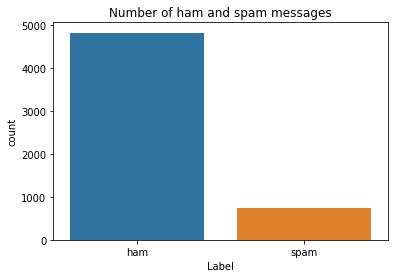

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
X_train.head()

4732    Good Morning my Dear Shijutta........... Have ...
1022                             We still on for tonight?
2012    Beautiful Truth against Gravity.. Read careful...
1026                         Yes da. Any plm at ur office
1226    Reply with your name and address and YOU WILL ...
Name: v2, dtype: object

In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
from keras import preprocessing
import keras
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 11s 248ms/step - loss: 0.3211 - accuracy: 0.8757 - val_loss: 0.1509 - val_accuracy: 0.9641
Epoch 2/10
30/30 [==============================] - 7s 232ms/step - loss: 0.0833 - accuracy: 0.9807 - val_loss: 0.0836 - val_accuracy: 0.9821


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
print(test_sequences)

[[344, 242, 12, 13, 568], [193, 1, 59, 54, 417, 483, 383, 21, 99, 1, 412, 128, 19, 169, 149, 70, 258, 84, 58, 70, 611, 134, 1, 59, 483, 99, 70, 770, 84], [122, 58, 3, 17, 4, 130, 452], [404, 3, 141, 175, 187, 524, 2, 27], [4, 21, 24, 168, 76, 266, 43, 33, 300], [165, 18, 53, 22, 2, 104], [38, 11, 746, 228, 19], [124, 159, 48, 76, 136, 194, 20, 1, 27, 968, 15, 139, 5, 66, 57, 4, 166, 96, 7, 8, 99, 23, 20, 141, 166, 270, 14], [32, 959, 8, 21, 213, 582, 5, 362, 4, 191, 26, 142, 69, 4, 191, 26, 142, 2, 56, 868], [174, 11, 8, 692, 37, 11, 8, 55, 19, 391, 599], [10, 25, 45, 514, 44, 9, 5, 447], [800, 155], [87, 511, 32, 46, 60, 2, 11, 81, 7, 182, 908, 1, 509, 195, 568, 2, 128, 182, 291, 60, 462, 35, 46, 96], [21], [27, 129, 803, 34, 8, 78], [252, 28, 24, 33, 335, 440, 37, 11], [196, 4, 34, 3, 5, 15, 69, 2, 191], [74, 4, 32, 312, 44, 559, 513, 745, 29, 35, 18, 15, 4, 886, 915, 2, 736, 9, 5], [61, 4, 130, 66, 27, 17, 607, 4, 578, 73], [88, 2, 196, 559, 536, 137, 29, 5, 368, 35, 68, 80, 2, 2, 3

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 19ms/step - loss: 0.0688 - accuracy: 0.9809


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.069
  Accuracy: 0.981


In [ ]:
import pickle

In [ ]:
filename= "my_model"
with open(filename, 'wb') as file:  
    pickle.dump(model, file)